Identifying Common Reasons for Cleansing and Profiling Data

In this first step we:


We imported necessary libraries (NumPy, Pandas, and Matplotlib).

Read a CSV file containing customer transactions into a Pandas DataFrame (df), using a raw string for the file path to avoid issues with backslashes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv(r"C:\Users\SEBALAMAKGOLO3\Downloads\customer_transactions.csv")
df


In [ ]:
# DISPLAY FIRST 10 ROWS
print(df.head(10))

In [ ]:
df.info()

In [ ]:

# Load the dataset from CSV file
#df = pd.read_csv(r"C:\Users\SEBALAMAKGOLO3\Downloads\customer_transactions.csv")

import pandas as pd
# Calculate the total of missing values
missing_values = df.isnull().sum()

# Calculate the percentage of the missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a summary of the missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Display only the columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

print("Missing Values Summary:")
print(missing_summary)

# Handling missing values

# Drop rows with missing customer_id (if any)
df = df.dropna(subset=['customer_id'])

# Fill customer age with the mean (for numerical columns)
df['customer_age'] = df['customer_age'].fillna(df['customer_age'].mean())

# Fill the state with the mode (for categorical columns)
df['state'] = df['state'].fillna(df['state'].mode()[0])

# Fill the membership status with the mode (for categorical columns)
df['membership_status'] = df['membership_status'].fillna(df['membership_status'].mode()[0])

# Verify if there are any missing values left after handling
remaining_missing = df.isnull().sum()
print("\nRemaining Missing Values After Cleaning:")
print(remaining_missing)


Check for Duplicates

Identify duplicate rows in the dataset.

In [7]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

    customer_id Transaction Date  Transaction_Amount  customer_age  \
101    CUST0002       2024-01-02              379.55         44.12   
102    CUST0003       2024-01-03              798.41         44.12   
103    CUST0004       2024-01-04               71.83         33.00   
104    CUST0005       2024-01-05              943.42         37.00   

          state membership_status transaction_type  transaction_amount  
101  california           Pending           Mobile              379.55  
102    New York            Active           Mobile              798.41  
103          ny            Active           Online               71.83  
104  california          Inactive         In-Store              943.42  


In [8]:
# Store the original row count
original_row_count = df.shape[0]

# Count duplicate rows
duplicate_rows = df[df.duplicated()]  # This will return all rows that are duplicates
duplicate_count = duplicate_rows.shape[0]

# Drop duplicate rows
df = df.drop_duplicates()

# Store the new number of rows after removing duplicates
new_row_count = df.shape[0]

# Calculate how many rows were removed
rows_removed_due_to_duplicates = original_row_count - new_row_count

# Print the result: how many duplicates were removed
print(f"Duplicate rows removed: {rows_removed_due_to_duplicates} (Total duplicates: {duplicate_count})")

Duplicate rows removed: 4 (Total duplicates: 4)


In [9]:
# Print the result
print(f"Cleaned data saved to 'cleaned_dataset.csv'.")
df


Cleaned data saved to 'cleaned_dataset.csv'.


,customer_id,Transaction Date,Transaction_Amount,customer_age,state,membership_status,transaction_type,transaction_amount
1,CUST0002,2024-01-02,379.55,44.12,california,Pending,Mobile,379.55
2,CUST0003,2024-01-03,798.41,44.12,New York,Active,Mobile,798.41
3,CUST0004,2024-01-04,71.83,33.00,ny,Active,Online,71.83
4,CUST0005,2024-01-05,943.42,37.00,california,Inactive,In-Store,943.42
5,CUST0006,2024-01-06,788.36,69.00,New York,Inactive,In-Store,788.36
...,...,...,...,...,...,...,...,...
95,CUST0096,2024-04-05,569.22,44.12,New York,Active,Mobile,569.22
96,CUST0097,2024-04-06,466.58,44.12,california,Inactive,Online,466.58
97,CUST0098,2024-04-07,524.31,35.00,California,Inactive,Online,524.31
98,CUST0099,2024-04-08,997.57,28.00,Texas,Inactive,Online,997.57


Standardize Column Names

Ensure all column names are consistent (e.g., lowercase, no spaces, or special characters).

In [10]:
# Optionally, standardize column names as well
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(r'\W', '', regex=True)
df.sample(5)
# Save the cleaned dataset to a new file
df.to_csv('cleaned_dataset.csv', index=False)
df

,customer_id,transaction_date,transaction_amount,customer_age,state,membership_status,transaction_type,transaction_amount
1,CUST0002,2024-01-02,379.55,44.12,california,Pending,Mobile,379.55
2,CUST0003,2024-01-03,798.41,44.12,New York,Active,Mobile,798.41
3,CUST0004,2024-01-04,71.83,33.00,ny,Active,Online,71.83
4,CUST0005,2024-01-05,943.42,37.00,california,Inactive,In-Store,943.42
5,CUST0006,2024-01-06,788.36,69.00,New York,Inactive,In-Store,788.36
...,...,...,...,...,...,...,...,...
95,CUST0096,2024-04-05,569.22,44.12,New York,Active,Mobile,569.22
96,CUST0097,2024-04-06,466.58,44.12,california,Inactive,Online,466.58
97,CUST0098,2024-04-07,524.31,35.00,California,Inactive,Online,524.31
98,CUST0099,2024-04-08,997.57,28.00,Texas,Inactive,Online,997.57


In [12]:
# Clean the column names, preserving 'transaction_date' and 'transaction_amount'
df.columns = [
    col if col in ['transaction_date', 'transaction_amount']
    else col.lower().replace(' ', '_')  # first replace spaces with underscores
    for col in df.columns
]

# Now apply regex-based cleaning using pandas' .str.replace() for non-preserved columns
df.columns = df.columns.str.replace(r'\W', '', regex=True)

# Display a sample of the cleaned dataset
print(df.sample(5))

# Save the cleaned dataset to a new file
df.to_csv('cleaned_dataset.csv', index=False)



   customer_id transaction_date  transaction_amount  customer_age       state  \
33    CUST0034       2024-02-03              727.91         41.00          ny   
37    CUST0038       2024-02-07              514.70         44.12    New York   
21    CUST0022       2024-01-22              280.01         44.12    New York   
22    CUST0023       2024-01-23              127.90         44.12  california   
67    CUST0068       2024-03-08              312.14         64.00       Texas   

   membership_status transaction_type  transaction_amount  
33           Pending         In-Store              727.91  
37          Inactive           Mobile              514.70  
21          Inactive         In-Store              280.01  
22          Inactive           Online              127.90  
67          Inactive           Online              312.14  


Identify and convert columns with incorrect data types (e.g., dates as strings, numeric values as objects).

In [34]:
# Display the initial data types
print("Initial Data Types:")
print(df.dtypes)
print(df.columns)

df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')  # Convert to datetime, invalid formats will be NaT
df['transaction_type'] = df['transaction_type'].astype('category')  # Convert to category
df['membership_status'] = df['membership_status'].astype('object')


# Display the updated data types
print("\nUpdated Data Types:")
print(df.dtypes)

# Save the cleaned dataset to a new file
df.to_csv('cleaned_dataset.csv', index=False)



Initial Data Types:
customer_id            object
transaction_date       object
customer_age          float64
state                  object
membership_status      object
transaction_type       object
transaction_amount    float64
transaction_amount    float64
dtype: object
Index(['customer_id', 'transaction_date', 'customer_age', 'state',
       'membership_status', 'transaction_type', 'transaction_amount',
       'transaction_amount'],
      dtype='object')

Updated Data Types:
customer_id                   object
transaction_date      datetime64[ns]
customer_age                 float64
state                         object
membership_status             object
transaction_type            category
transaction_amount           float64
transaction_amount           float64
dtype: object


Detect Outliers

Use boxplots to detect outliers in numerical columns.

In [35]:
# Display basic statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe())


Statistical summary of numerical columns:
                    transaction_date  customer_age  transaction_amount  \
count                             56     56.000000           56.000000   
mean   2024-02-16 06:25:42.857142784     42.482143          470.360714   
min              2024-01-04 00:00:00     18.000000           21.330000   
25%              2024-01-18 18:00:00     30.750000          172.897500   
50%              2024-02-14 12:00:00     42.000000          436.990000   
75%              2024-03-11 06:00:00     56.000000          793.282500   
max              2024-04-08 00:00:00     70.000000          997.570000   
std                              NaN     15.845838          323.460051   

       transaction_amount  
count           56.000000  
mean           470.360714  
min             21.330000  
25%            172.897500  
50%            436.990000  
75%            793.282500  
max            997.570000  
std            323.460051  


In [36]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

Index(['customer_age', 'transaction_amount', 'transaction_amount'], dtype='object')


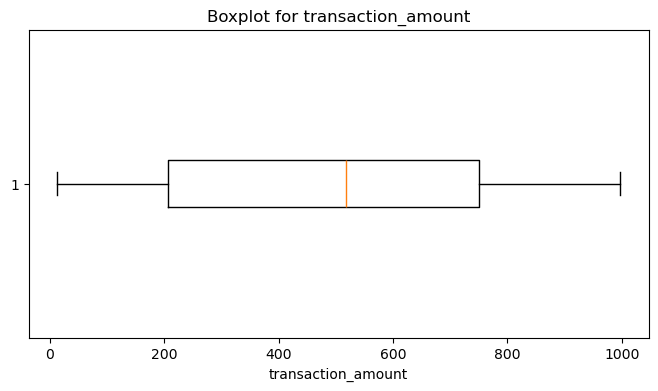

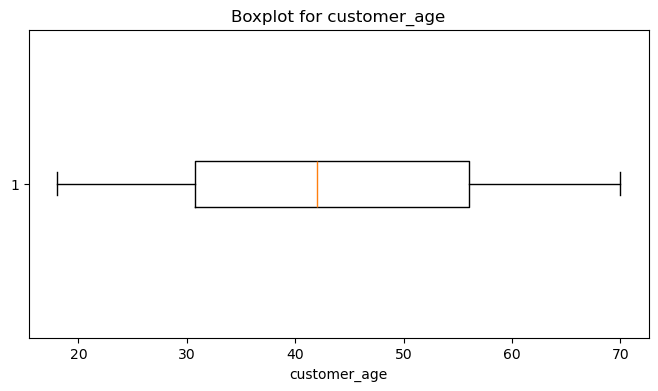

In [37]:

# Replace 'dataset.csv' with your actual dataset file name
df = pd.read_csv(r"C:\Users\SEBALAMAKGOLO3\Downloads\customer_transactions.csv")
# List of numerical columns in your DataFrame (update this list as necessary)

import matplotlib.pyplot as plt
numerical_columns = ['transaction_amount', 'customer_age']

# Define a function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Loop through the numerical columns and create a boxplot for each
for column in numerical_columns:
    plt.figure(figsize=(8, 4))  # Set figure size for better readability
    
    # Remove outliers from 'customer_age'
    if column == 'customer_age':
        df = remove_outliers(df, column)
    
    plt.boxplot(df[column].dropna(), vert=False)  # Create the boxplot, drop NaN values
    plt.title(f'Boxplot for {column}')  # Title for each plot
    plt.xlabel(column)  # Label for the x-axis (numerical values)
    plt.show()


In [38]:

# Save the cleaned dataset to a new file
df.to_csv('cleaned_dataset.csv', index=False)

Check for inconsistencies in string columns (e.g., state names, customer IDs)

Standardize the format of the string data.

Deliverable: Dataset with cleaned string columns.

In [39]:
import pandas as pd
# Define a function to clean and standardize string data
def clean_and_standardize_string(column):
    # Ensure the column is a string type
    return (
        column.astype(str)  # Convert to string
        .str.strip()        # Strip leading and trailing whitespaces
        .str.lower()        # Convert to lowercase
        .str.title()        # Capitalize the first letter of each word
        .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
    )
 
# Identify and clean all object (string) columns
string_columns = df.select_dtypes(include=['object']).columns
for col in string_columns:
    df[col] = clean_and_standardize_string(df[col])
#Verify the changes in the column data
print("Cleaned and Standardized String Columns:")
print(df[string_columns].head())


# Save the cleaned dataset to a new file
df.to_csv('cleaned_dataset.csv', index=False)




Cleaned and Standardized String Columns:
  customer_id Transaction Date       state membership_status transaction_type
3    Cust0004       2024-01-04          Ny            Active           Online
4    Cust0005       2024-01-05  California          Inactive         In-Store
5    Cust0006       2024-01-06    New York          Inactive         In-Store
6    Cust0007       2024-01-07  California           Pending           Mobile
7    Cust0008       2024-01-08  California               Nan           Online


In [40]:
# 1. Identify constant columns (columns with a single unique value)
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print(f"Constant columns: {constant_columns}")

# 2. Identify columns with too many missing values (e.g., more than 50% missing)
missing_threshold = 0.5  # Adjust the threshold as needed (e.g., 50% missing data)
columns_with_missing_data = [col for col in df.columns if df[col].isnull().mean() > missing_threshold]

print(f"Columns with too many missing values: {columns_with_missing_data}")

# 3. Remove constant columns and columns with too many missing values
df.drop(columns=constant_columns + columns_with_missing_data, inplace=True)

# Output the cleaned dataset
print("Dataset with irrelevant features removed:")
print(df.head())

# Optionally, save the cleaned dataset to a new CSV file
df.to_csv("cleaned_customer_transactions.csv", index=False)


# Optionally, save the cleaned dataset to a new CSV file
df.to_csv("cleaned_dataset.csv", index=False)




Constant columns: []
Columns with too many missing values: []
Dataset with irrelevant features removed:
  customer_id Transaction Date  Transaction_Amount  customer_age       state  \
3    Cust0004       2024-01-04               71.83          33.0          Ny   
4    Cust0005       2024-01-05              943.42          37.0  California   
5    Cust0006       2024-01-06              788.36          69.0    New York   
6    Cust0007       2024-01-07              995.68          64.0  California   
7    Cust0008       2024-01-08              263.66          42.0  California   

  membership_status transaction_type  transaction_amount  
3            Active           Online               71.83  
4          Inactive         In-Store              943.42  
5          Inactive         In-Store              788.36  
6           Pending           Mobile              995.68  
7               Nan           Online              263.66  


In [41]:
df

,customer_id,Transaction Date,Transaction_Amount,customer_age,state,membership_status,transaction_type,transaction_amount
3,Cust0004,2024-01-04,71.83,33.0,Ny,Active,Online,71.83
4,Cust0005,2024-01-05,943.42,37.0,California,Inactive,In-Store,943.42
5,Cust0006,2024-01-06,788.36,69.0,New York,Inactive,In-Store,788.36
6,Cust0007,2024-01-07,995.68,64.0,California,Pending,Mobile,995.68
7,Cust0008,2024-01-08,263.66,42.0,California,Nan,Online,263.66
9,Cust0010,2024-01-10,454.60,51.0,Texas,Inactive,In-Store,454.60
10,Nan,2024-01-11,71.73,30.0,Texas,Active,In-Store,71.73
11,Cust0012,2024-01-12,337.75,46.0,New York,Pending,In-Store,337.75
14,Cust0015,2024-01-15,181.66,23.0,Ny,Active,In-Store,181.66
15,Cust0016,2024-01-16,831.88,63.0,California,Pending,Mobile,831.88


In [42]:
# Remove only the first occurrence of 'transaction_amount' column
columns = df.columns.tolist()
if 'transaction_amount' in columns:
    columns.remove('transaction_amount')
    df = df[columns]

# Output the cleaned dataset
print("Cleaned Data (First 5 Rows):")
print(df.head())  # Display the first 5 rows of the cleaned data

# Save the cleaned dataset to a new file
df.to_csv('cleaned_dataset.csv', index=False)

df

 

Cleaned Data (First 5 Rows):
  customer_id Transaction Date  Transaction_Amount  customer_age       state  \
3    Cust0004       2024-01-04               71.83          33.0          Ny   
4    Cust0005       2024-01-05              943.42          37.0  California   
5    Cust0006       2024-01-06              788.36          69.0    New York   
6    Cust0007       2024-01-07              995.68          64.0  California   
7    Cust0008       2024-01-08              263.66          42.0  California   

  membership_status transaction_type  
3            Active           Online  
4          Inactive         In-Store  
5          Inactive         In-Store  
6           Pending           Mobile  
7               Nan           Online  


,customer_id,Transaction Date,Transaction_Amount,customer_age,state,membership_status,transaction_type
3,Cust0004,2024-01-04,71.83,33.0,Ny,Active,Online
4,Cust0005,2024-01-05,943.42,37.0,California,Inactive,In-Store
5,Cust0006,2024-01-06,788.36,69.0,New York,Inactive,In-Store
6,Cust0007,2024-01-07,995.68,64.0,California,Pending,Mobile
7,Cust0008,2024-01-08,263.66,42.0,California,Nan,Online
9,Cust0010,2024-01-10,454.60,51.0,Texas,Inactive,In-Store
10,Nan,2024-01-11,71.73,30.0,Texas,Active,In-Store
11,Cust0012,2024-01-12,337.75,46.0,New York,Pending,In-Store
14,Cust0015,2024-01-15,181.66,23.0,Ny,Active,In-Store
15,Cust0016,2024-01-16,831.88,63.0,California,Pending,Mobile


Profile the Dataset

In [43]:
# Clean the column names, preserving 'transaction_date' and 'transaction_amount'
df.columns = [
    col if col in ['transaction_date', 'transaction_amount']
    else col.lower().replace(' ', '_')  # first replace spaces with underscores
    for col in df.columns
]

# Now apply regex-based cleaning using pandas' .str.replace() for non-preserved columns
df.columns = df.columns.str.replace(r'\W', '', regex=True)

# Display a sample of the cleaned dataset
print(df.sample(5))

# Save the cleaned dataset to a new file
df.to_csv('cleaned_dataset.csv', index=False)
df


   customer_id transaction_date  transaction_amount  customer_age       state  \
15    Cust0016       2024-01-16              831.88          63.0  California   
74    Cust0075       2024-03-15              518.40          68.0    New York   
94    Cust0095       2024-04-04              736.58          60.0          Ny   
65    Cust0066       2024-03-06               35.40          24.0         Nan   
33    Cust0034       2024-02-03              727.91          41.0          Ny   

   membership_status transaction_type  
15           Pending           Mobile  
74               Nan           Online  
94            Active           Online  
65               Nan           Online  
33           Pending         In-Store  


,customer_id,transaction_date,transaction_amount,customer_age,state,membership_status,transaction_type
3,Cust0004,2024-01-04,71.83,33.0,Ny,Active,Online
4,Cust0005,2024-01-05,943.42,37.0,California,Inactive,In-Store
5,Cust0006,2024-01-06,788.36,69.0,New York,Inactive,In-Store
6,Cust0007,2024-01-07,995.68,64.0,California,Pending,Mobile
7,Cust0008,2024-01-08,263.66,42.0,California,Nan,Online
9,Cust0010,2024-01-10,454.60,51.0,Texas,Inactive,In-Store
10,Nan,2024-01-11,71.73,30.0,Texas,Active,In-Store
11,Cust0012,2024-01-12,337.75,46.0,New York,Pending,In-Store
14,Cust0015,2024-01-15,181.66,23.0,Ny,Active,In-Store
15,Cust0016,2024-01-16,831.88,63.0,California,Pending,Mobile


  customer_id transaction_date  transaction_amount  customer_age       state  \
3    Cust0004       2024-01-04               71.83          33.0          Ny   
4    Cust0005       2024-01-05              943.42          37.0  California   
5    Cust0006       2024-01-06              788.36          69.0    New York   
6    Cust0007       2024-01-07              995.68          64.0  California   
7    Cust0008       2024-01-08              263.66          42.0  California   

  membership_status transaction_type  
3            Active           Online  
4          Inactive         In-Store  
5          Inactive         In-Store  
6           Pending           Mobile  
7               Nan           Online  


C:\Users\SEBALAMAKGOLO3\anaconda4\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

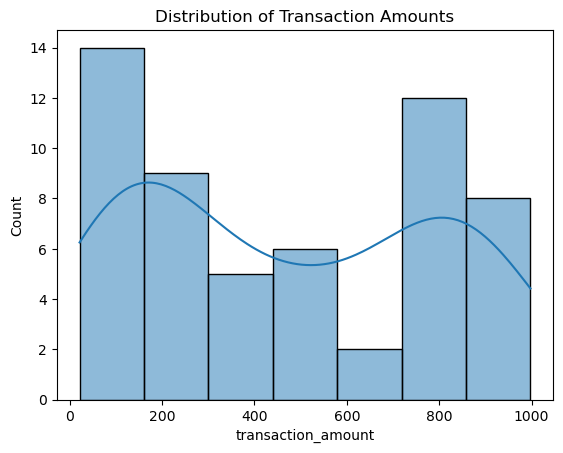

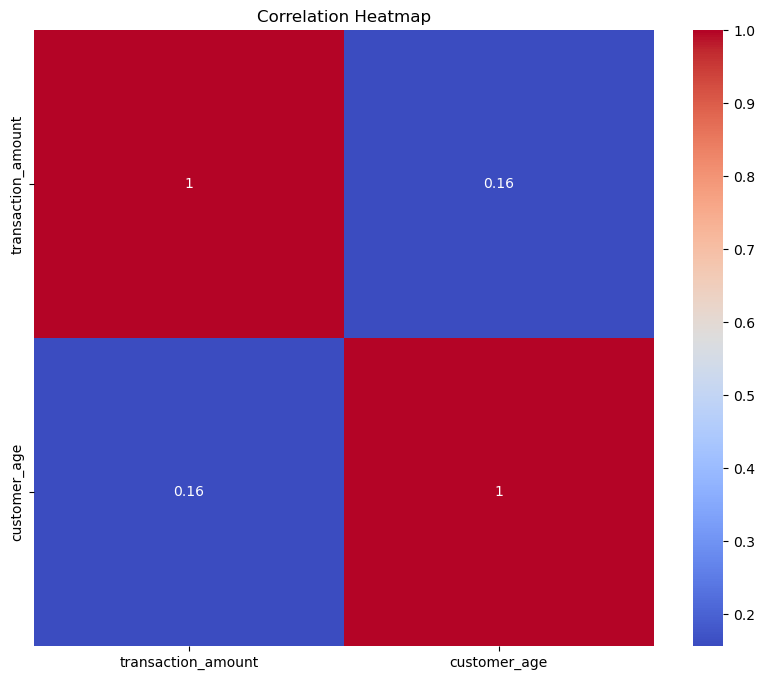

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
%matplotlib inline

# Display the first few rows
print(df.head())

# Generate the profiling report
profile = ProfileReport(df, title="Customer Transactions Profiling Report", explorative=True)

# Save the report as an HTML file
profile.to_file("profiling_report.html")


# Example: Distribution of a numerical column
# Replace 'transaction_amount' with the actual numerical column name from your dataset
if 'transaction_amount' in df.columns:
    sns.histplot(df['transaction_amount'], kde=True)
    plt.title("Distribution of Transaction Amounts")
    plt.show()
else:
    print("Column 'transaction_amount' not found in dataset.")

# Correlation matrix using only numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
if not numeric_df.empty:  # Check if there are numeric columns
    corr = numeric_df.corr()

    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')  # Fixed the string here
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns found for correlation matrix.")
